In [1]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---
# Datasets

In [4]:
# DataSets -- load_* or make_* or fetch_*
from sklearn.datasets import load_breast_cancer, make_blobs, fetch_20newsgroups

In [5]:
bc_data = load_breast_cancer()
bc_data.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [7]:
DataFrame(bc_data['data'], columns=bc_data['feature_names']).iloc[:10, :10]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243


In [9]:
print bc_data['target'][:10]
bc_data['target_names']

[0 0 0 0 0 0 0 0 0 0]


array(['malignant', 'benign'],
      dtype='|S9')

----
## Splitting

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = bc_data['data']
y = bc_data['target']

X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=97467)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


---
# Transformers

- Take data as input, produce a representation of data as ouput
- have `.fit()` and `.transform()` methods (also `fit_transform`)

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import Imputer, OneHotEncoder
from sklearn.preprocessing import LabelEncoder, Binarizer

In [10]:
RobustScaler?

In [13]:
rs = RobustScaler()

In [14]:
rs.fit(X_tr)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [15]:
X_tr_scaled = rs.transform(X_tr)
X_te_scaled = rs.transform(X_te)

----
## Dimensionality Reduction

In [16]:
from sklearn.decomposition import PCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import Isomap, MDS, TSNE

In [17]:
tsne = TSNE()

In [18]:
X_tr_2dim = tsne.fit_transform(X_tr_scaled)

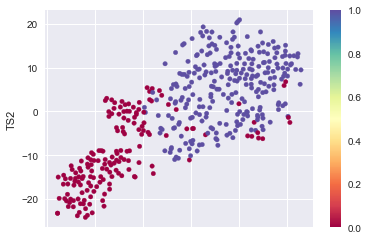

In [19]:
(DataFrame(X_tr_2dim, columns=['TS1', 'TS2'])
 .plot.scatter(x='TS1', y='TS2', c=y_tr, cmap='Spectral'));

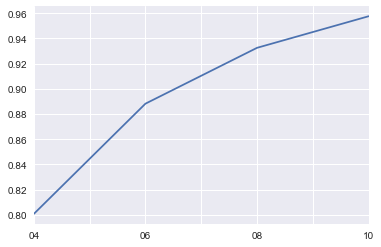

In [20]:
pca_evr = {}
for n in range(4, 12, 2):
    pca = PCA(n_components=n)
    pca.fit(X_tr_scaled)
    pca_evr[str(n).zfill(2)] = pca.explained_variance_ratio_.sum()
    
Series(pca_evr).plot();    

In [21]:
pca = PCA(n_components=8)
pca.fit(X_tr_scaled)

X_tr_pca = pca.transform(X_tr_scaled)
X_te_pca = pca.transform(X_te_scaled)

---
# $Estimators$

<big>
- take data + target as input, produce predictions as probabilities or labels<br><br>
- have `.fit()` and `.predict()` (also `.predict_proba()`) methods<br><br>
- The method is <br><br>
    - Instantiate the model class object <br>
    `rc = modelClass()`<br><br>
    - Use the fit method to estimate parameters<br>
    `rc.fit(X_tr_model, y_tr)`<br><br>
    - Use the predict probability method to make predictions<br>
    `rc.predict_proba(X_te_model)`

In [22]:
# Popular Regression Models
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor

# Popular Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier

# Popular Clustering Models
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering

In [28]:
clf_svm_1 = SVC(kernel='poly')
clf_svm_1.fit(X_tr_pca, y_tr)

y_pred = clf_svm_1.predict(X_te_pca)

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [30]:
print classification_report(y_te, y_pred)

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        46
          1       0.99      1.00      0.99        97

avg / total       0.99      0.99      0.99       143



In [31]:
confusion_matrix(y_te, y_pred)

array([[45,  1],
       [ 0, 97]], dtype=int64)

In [32]:
accuracy_score(y_te, y_pred)

0.99300699300699302

---
# Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid_clf = {'max_depth': [2, 4, 6, 8],
           'min_samples_leaf': [5, 10, 15, 25]}

In [37]:
gscv_1 = GridSearchCV(estimator=DecisionTreeClassifier(), 
                      param_grid=grid_clf, 
                      scoring='roc_auc', 
                      cv=5, verbose=True, n_jobs=-1)

In [38]:
gscv_1.fit(X_tr_pca, y_tr)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [5, 10, 15, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [39]:
gscv_1.best_score_

0.95641392575941053

In [40]:
gscv_1.best_params_

{'max_depth': 4, 'min_samples_leaf': 25}

In [41]:
y_pred = gscv_1.predict(X_te_pca)

In [42]:
print classification_report(y_pred, y_te)

             precision    recall  f1-score   support

          0       0.89      0.91      0.90        45
          1       0.96      0.95      0.95        98

avg / total       0.94      0.94      0.94       143



In [43]:
print confusion_matrix(y_pred, y_te)

[[41  4]
 [ 5 93]]


---
# Pipeline

pipeline helps you automize several step of the learning process. Such as the training and testing of models or feature selection... So if you want to mix a regression then use it to feed a classifier for instance, your steps will be the training of that regression and then of the classifier.

--
Transformer in scikit-learn - some class that have fit and transform method, or fit_transform method.

Predictor - some class that has fit and predict methods, or fit_predict method.

Pipeline is just an abstract notion, it's not some existing ml algorithm. Often in ML tasks you need to perform sequence of different transformations (find set of features, generate new features, select only some good features) of raw dataset before applying final estimator.

Pipeline gives you a single interface for all 3 steps of transformation and resulting estimator. It encapsulates transformers and predictors inside.

With pipelines you can easily perform a grid-search over set of parameters for each step of this meta-estimator. 

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
pipe_1 = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA()),
                   ('tree', DecisionTreeClassifier())])

In [47]:
pipe_grid = {'pca__n_components': [4, 6, 8, 12],
             'tree__max_depth': [3, 6, 9],
             'tree__min_samples_leaf': [5, 10, 15, 25]}

In [48]:
gscv_1 = GridSearchCV(estimator=pipe_1, 
                      param_grid=pipe_grid, 
                      scoring='accuracy', 
                      cv=5, 
                      verbose=True)

In [49]:
gscv_1.fit(X_tr, y_tr)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    3.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
         ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tree__max_depth': [3, 6, 9], 'pca__n_components': [4, 6, 8, 12], 'tree__min_samples_leaf': [5, 10, 15, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [50]:
gscv_1.best_params_

{'pca__n_components': 4, 'tree__max_depth': 3, 'tree__min_samples_leaf': 5}

In [51]:
df_results = DataFrame(gscv_1.cv_results_)
cols = filter(lambda x: 'param_' in x, df_results.columns) + filter(lambda x: 'mean_' in x or 'std_' in x, df_results.columns)

df_results[cols].sort_values('mean_test_score', ascending=False)[:10]

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\

,param_pca__n_components,param_tree__max_depth,param_tree__min_samples_leaf,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,4,3,5,0.0084,0.0002,0.929577,0.953640,0.009810,3.999710e-04,0.025666,0.005034
9,4,9,10,0.0042,0.0008,0.929577,0.951880,0.000980,3.999949e-04,0.026720,0.002955
1,4,3,10,0.0050,0.0008,0.929577,0.950707,0.002098,7.482900e-04,0.026720,0.003380
17,6,6,10,0.0042,0.0010,0.929577,0.951880,0.000400,1.168008e-07,0.026720,0.002955
13,6,3,10,0.0084,0.0006,0.929577,0.950707,0.007310,4.898624e-04,0.026720,0.003380
21,6,9,10,0.0046,0.0008,0.929577,0.951880,0.000490,3.999710e-04,0.026720,0.002955
5,4,6,10,0.0032,0.0002,0.929577,0.951880,0.000400,4.000664e-04,0.026720,0.002955
8,4,9,5,0.0042,0.0006,0.924883,0.964202,0.000400,4.899014e-04,0.029136,0.004690
32,8,9,5,0.0036,0.0008,0.924883,0.964202,0.000800,3.999710e-04,0.020428,0.005043
41,12,6,10,0.0060,0.0004,0.922535,0.951880,0.000633,4.898624e-04,0.024163,0.002955


---
# Practice

In [52]:
import numpy as np
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(1000, 100))
y = rnd.normal(size=(1000,))

In [53]:
X.shape

(1000L, 100L)

In [54]:
X

array([[ 1.76405235,  0.40015721,  0.97873798, ...,  1.78587049,
         0.12691209,  0.40198936],
       [ 1.8831507 , -1.34775906, -1.270485  , ...,  0.82350415,
         2.16323595,  1.33652795],
       [-0.36918184, -0.23937918,  1.0996596 , ...,  0.58295368,
        -0.39944903,  0.37005589],
       ..., 
       [ 1.28934577,  0.33166826, -1.27354493, ..., -0.67916278,
         0.37037282, -0.38137454],
       [-1.29397689, -0.41875812,  0.23463909, ..., -0.45557464,
        -0.36280909, -2.26331621],
       [-0.64481361, -0.74524313,  0.23341464, ...,  0.72618198,
        -1.16783052, -1.28520765]])

In [55]:
y

array([ -4.83797492e-01,   1.28805706e+00,  -1.29878712e-01,
        -1.98078388e-01,  -3.34487592e-01,  -3.91443186e-01,
        -6.12406176e-01,  -6.76523964e-01,   1.32722966e+00,
        -4.48695446e-01,  -3.16407305e-01,   3.08305560e-02,
        -3.13356726e-01,  -1.73259184e-01,  -3.27368719e-01,
         9.44368248e-01,   1.12201738e+00,   1.12338731e-01,
         1.37234022e+00,   2.06256184e+00,  -2.44855900e+00,
        -5.61988408e-01,   3.55098820e-01,   6.34378170e-01,
        -3.92450091e-01,  -8.13156399e-01,  -2.32873263e-01,
         2.46801210e-01,  -5.62413197e-01,  -8.41602015e-01,
        -9.42120025e-01,   9.45373015e-01,   1.40910705e-01,
         1.75356584e+00,  -3.47223685e-01,  -1.48949341e+00,
        -5.08035412e-01,   1.99265003e+00,   5.55461973e-01,
        -1.69607695e+00,   1.75236616e+00,  -5.97550816e-01,
        -4.66491398e-01,  -1.09479228e+00,  -6.45424882e-01,
        -2.02154830e-01,   2.05073469e-01,  -2.70385827e-01,
        -3.10299496e-01,

### Without Pipeline

In [56]:
from sklearn.feature_selection import SelectPercentile, f_regression

# SelectPercentile will retain the x% highest scores
select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)

X_selected.shape

(1000L, 5L)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

print cross_val_score(Ridge(), X_selected, y, cv=5, scoring='neg_mean_squared_error')
print np.mean(cross_val_score(Ridge(), X_selected, y, cv=5, scoring='neg_mean_squared_error'))

[-1.02335858 -0.97113231 -1.00493149 -0.92307327 -0.97330667]
-0.979160465537


### With Pipeline

In [58]:
pipe = Pipeline([("select", SelectPercentile(score_func=f_regression,
                                             percentile=5)),
                 ("ridge", Ridge())])


print cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_squared_error')
print np.mean(cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_squared_error'))

[-1.0908141  -1.01087973 -1.02167786 -0.92802126 -1.01231244]
-1.01274107619


In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [60]:
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

In [61]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [63]:
print("Logistic regression step:\n{}".format(
      grid.best_estimator_.named_steps["logisticregression"]))

Logistic regression step:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [64]:
print("Logistic regression coefficients:\n{}".format(
      grid.best_estimator_.named_steps["logisticregression"].coef_))

Logistic regression coefficients:
[[-0.38856355 -0.37529972 -0.37624793 -0.39649439 -0.11519359  0.01709608
  -0.3550729  -0.38995414 -0.05780518  0.20879795 -0.49487753 -0.0036321
  -0.37122718 -0.38337777 -0.04488715  0.19752816  0.00424822 -0.04857196
   0.21023226  0.22444999 -0.54669761 -0.52542026 -0.49881157 -0.51451071
  -0.39256847 -0.12293451 -0.38827425 -0.4169485  -0.32533663 -0.13926972]]


---
### Grid-searching preprocessing steps and model parameters

In [65]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)

pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [66]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [67]:
grid = GridSearchCV(pipe, param_grid=param_grid, 
                    cv=5, verbose=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    6.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'polynomialfeatures__degree': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

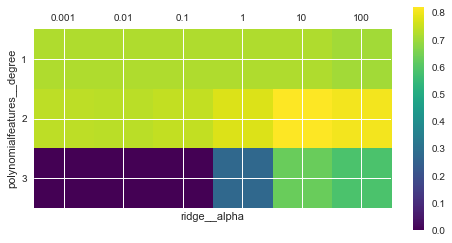

In [68]:
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1),
            vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
           param_grid['polynomialfeatures__degree'])

plt.colorbar()

In [69]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'ridge__alpha': 10, 'polynomialfeatures__degree': 2}


In [70]:
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Test-set score: 0.77


In [71]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Score without poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score without poly features: 0.63


In [72]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [73]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True), 'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 10}

Best cross-validation score: 0.99
Test-set score: 0.98
